In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
import os
pwd=os.getcwd()

In [10]:
file_path = os.path.join(pwd,'UpdatedWeek1.csv')
data_import = pd.read_csv(file_path)

In [11]:
data_import

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,NaN,0.0,NaN,United-States,NaN
1,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,NaN,0.0,NaN,40.0,United-States,<=50K
2,53.0,Private,234721.0,11th,NaN,Married-civ-spouse,NaN,Husband,Black,NaN,0.0,NaN,40.0,United-States,<=50K
3,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,NaN,0.0,0.0,NaN,NaN,NaN
4,37.0,Private,284582.0,Masters,14.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39.0,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,NaN,White,Female,NaN,0.0,36.0,United-States,<=50K
48837,64.0,NaN,321403.0,HS-grad,9.0,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K
48838,38.0,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,0.0,50.0,United-States,NaN
48839,44.0,Private,83891.0,Bachelors,13.0,NaN,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K


In [12]:
# Standardize column names
data_import.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 
                'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
                'hours_per_week', 'native_country', 'income']


In [14]:
# Calculate the percentage of missing values for each column
missing_values = data_import.isnull().sum()
missing_percentage = (missing_values / len(data_import)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Percentage of missing values in each column:")
print(missing_data)

Percentage of missing values in each column:
                Missing Values  Percentage
age                       4134    8.464200
workclass                 7645   15.652833
fnlwgt                    2672    5.470813
education                 3225    6.603059
education_num             9484   19.418112
marital_status            4257    8.716038
occupation               11570   23.689114
relationship             10645   21.795213
race                      8413   17.225282
sex                      12188   24.954444
capital_gain              6694   13.705698
capital_loss              9338   19.119183
hours_per_week           11958   24.483528
native_country            3231    6.615344
income                    8908   18.238775


In [15]:
# Drop columns with more than 20% missing values
threshold = 20 
columns_to_drop = missing_data[missing_data['Percentage'] > threshold].index
data = data_import.drop(columns=columns_to_drop)

In [16]:
# Impute missing values for remaining columns
# For numerical columns, we will use median
numerical_columns = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_20039/1888826919.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


In [19]:
# For categorical columns, we will use mode
categorical_columns = ['workclass', 'education', 'marital_status', 'race', 'native_country', 'income']
for col in categorical_columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

/var/folders/c2/1r0mkqmd2m9_rfjz2nqb7x7m0000gn/T/ipykernel_20039/2056930685.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [20]:
# Verify that there are no missing values
print(data.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
race              0
capital_gain      0
capital_loss      0
native_country    0
income            0
dtype: int64


In [28]:
#encoding
# Convert categorical variables to numerical
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

In [29]:
# Ensure all columns are numeric
numeric_data = data.apply(pd.to_numeric, errors='coerce')

In [30]:
# Drop any remaining non-numeric columns
numeric_data = numeric_data.dropna(axis=1, how='any')

In [31]:
# Verify numeric columns for correlation matrix
print("Columns used for correlation matrix:")
print(numeric_data.columns)

Columns used for correlation matrix:
Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'race', 'capital_gain', 'capital_loss',
       'native_country', 'income', 'income_num'],
      dtype='object')


In [32]:
# Correlation matrix
correlation_matrix = numeric_data.corr()

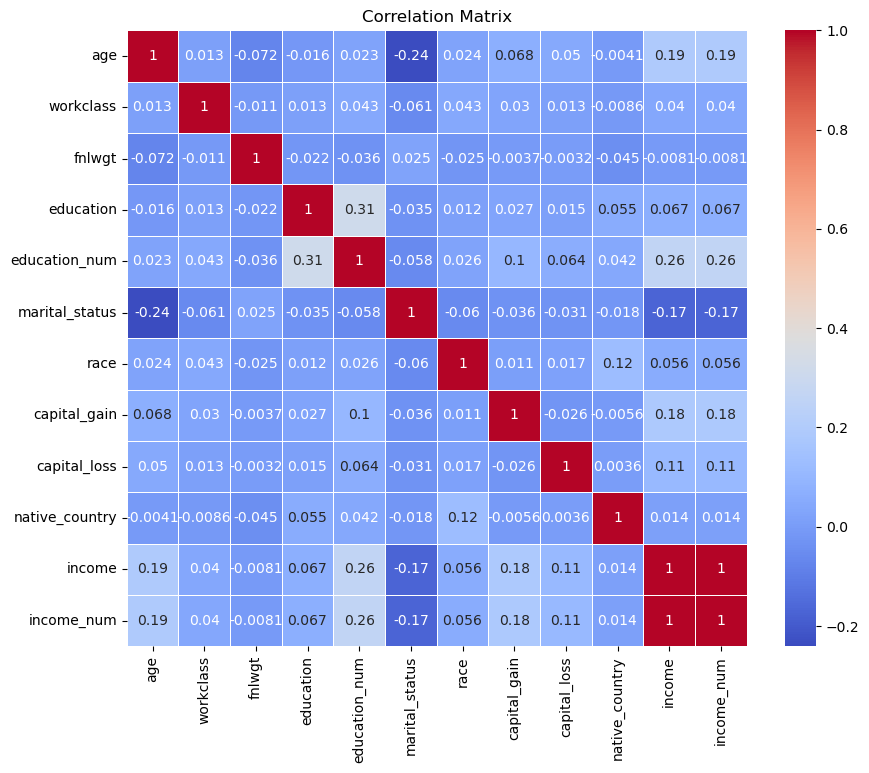

In [33]:
# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [34]:
# Select features and target variable
# Select more features based on the correlation matrix
features = numeric_data.drop(columns=['income', 'income_num'])
target = numeric_data['income_num']

In [35]:
# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.3, random_state=42)


In [37]:
# Function to build and evaluate KNN model
def build_and_evaluate_knn(X_train, X_test, y_train, y_test, k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return cm, report

In [38]:
# KNN with K = 3
cm_k3, report_k3 = build_and_evaluate_knn(X_train, X_test, y_train, y_test, 3)
print("Confusion Matrix for K=3:")
print(cm_k3)
print("Classification Report for K=3:")
print(report_k3)

Confusion Matrix for K=3:
[[10675  1088]
 [ 1739  1151]]
Classification Report for K=3:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     11763
           1       0.51      0.40      0.45      2890

    accuracy                           0.81     14653
   macro avg       0.69      0.65      0.67     14653
weighted avg       0.79      0.81      0.80     14653



In [39]:
# KNN with K = 5
cm_k5, report_k5 = build_and_evaluate_knn(X_train, X_test, y_train, y_test, 5)
print("Confusion Matrix for K=5:")
print(cm_k5)
print("Classification Report for K=5:")
print(report_k5)

Confusion Matrix for K=5:
[[10851   912]
 [ 1733  1157]]
Classification Report for K=5:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11763
           1       0.56      0.40      0.47      2890

    accuracy                           0.82     14653
   macro avg       0.71      0.66      0.68     14653
weighted avg       0.80      0.82      0.81     14653



In [40]:
# KNN with K = 7
cm_k7, report_k7 = build_and_evaluate_knn(X_train, X_test, y_train, y_test, 7)
print("Confusion Matrix for K=7:")
print(cm_k7)
print("Classification Report for K=7:")
print(report_k7)

Confusion Matrix for K=7:
[[10928   835]
 [ 1739  1151]]
Classification Report for K=7:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11763
           1       0.58      0.40      0.47      2890

    accuracy                           0.82     14653
   macro avg       0.72      0.66      0.68     14653
weighted avg       0.81      0.82      0.81     14653

